In [ ]:
pip install qiskit

In [ ]:
pip list

In [ ]:
pip install qiskit[visualization]

In [ ]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
import numpy as np

# Clase 1-2:

1-

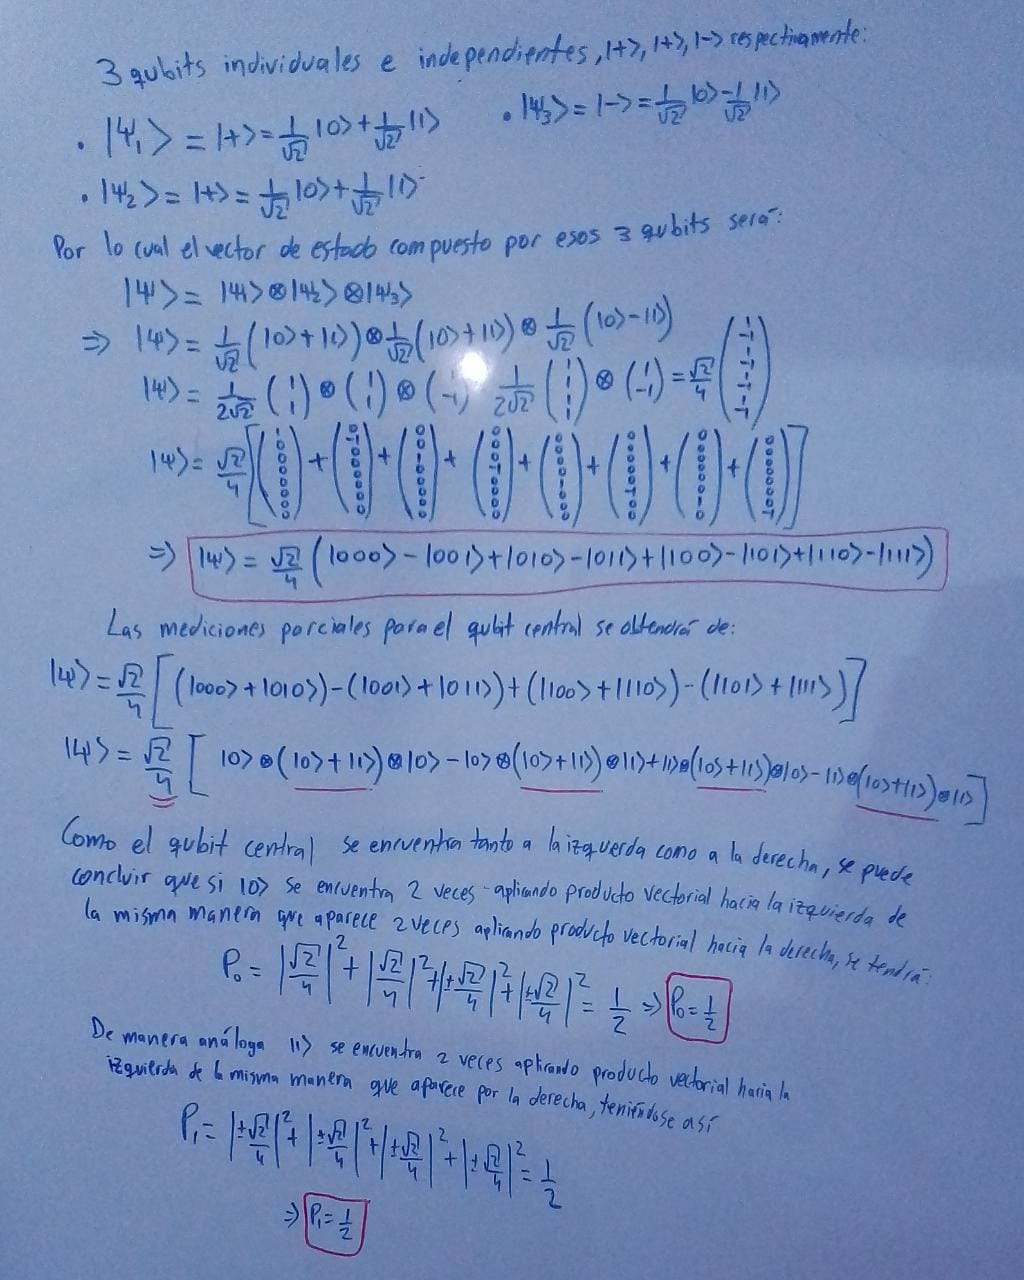

Ahora usando quisqit:

In [ ]:
ket_plus_plus_moins = Statevector.from_label('++-')
ket_plus_plus_moins.draw('Latex')

<IPython.core.display.Latex object>

Verificando que está normalizado:

In [ ]:
ket_plus_plus_moins.is_valid()

True

Mediciones parciales para el qubit central:

In [ ]:
probs_ket_plus_plus_moins = ket_plus_plus_moins.probabilities_dict([1])
print('probs: {}'.format(probs_ket_plus_plus_moins))

probs: {'0': 0.4999999999999998, '1': 0.4999999999999998}


2.

El sistema mostrado tiene como mínimo 4 qubits independientes. Donde solo habrá 2 posibles combinaciones de qubits para dicho sistema.

El cual se puede corroborar tomando este sistema particular:

In [ ]:
from qiskit.visualization import array_to_latex
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import random_statevector, Statevector

In [ ]:
ket = Statevector([0, 0, 1/np.sqrt(2), 0,0,0,0,0,0,0,0,0,0,1/np.sqrt(2),0,0])
ket.draw('Latex')

<IPython.core.display.Latex object>

In [ ]:
ket.is_valid()

True

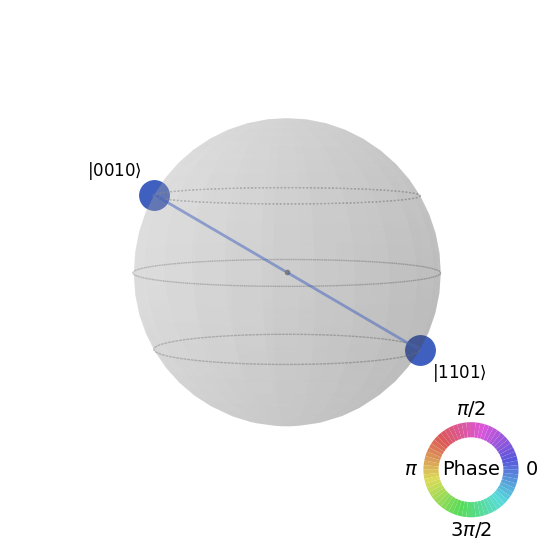

In [ ]:
plot_state_qsphere(ket)

3.

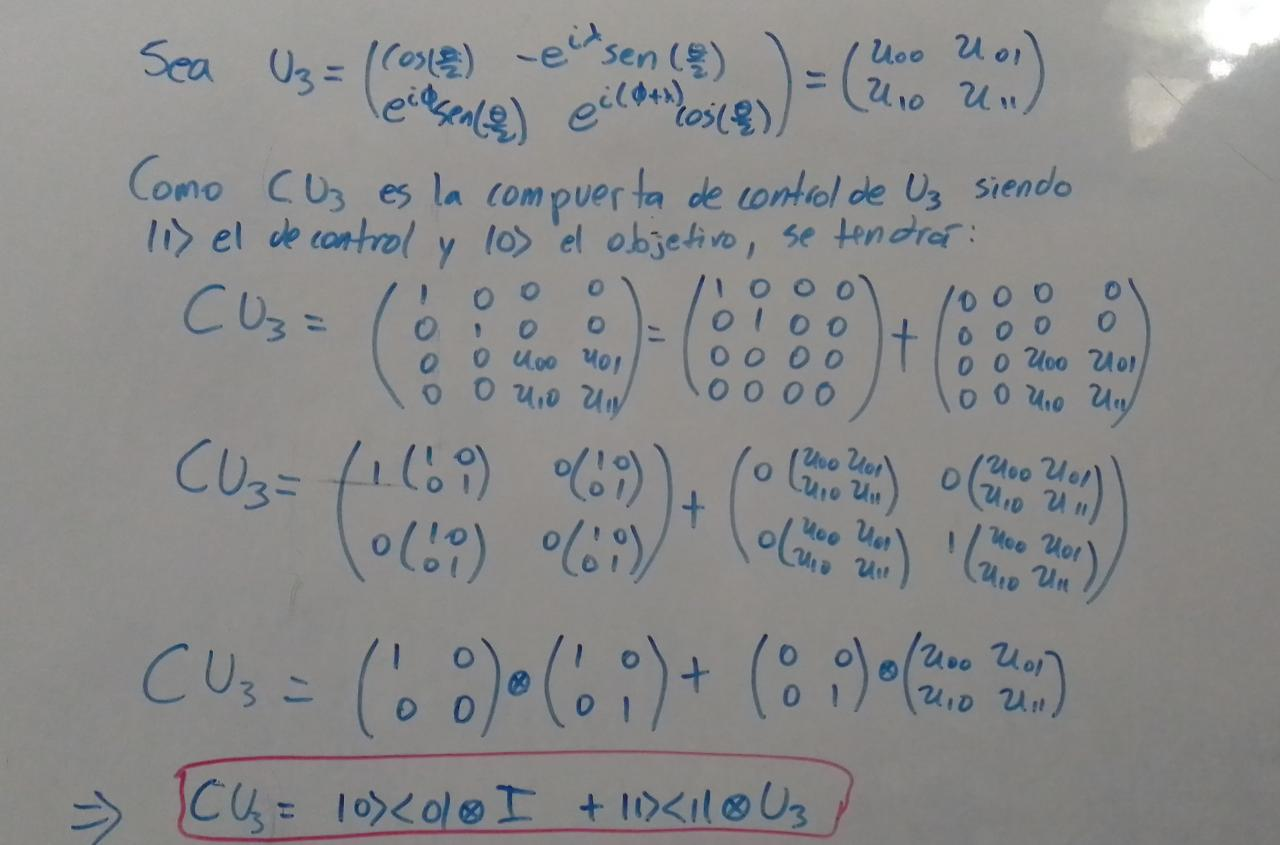

       ┌──────────────────────────────────────────────┐ 
q_0: ──┤ Initialize(0.23006-0.57989j,-0.557+0.54822j) ├─
     ┌─┴──────────────────────────────────────────────┴┐
q_1: ┤ Initialize(0.20054+0.91556j,-0.055581-0.34416j) ├
     └─────────────────────────────────────────────────┘


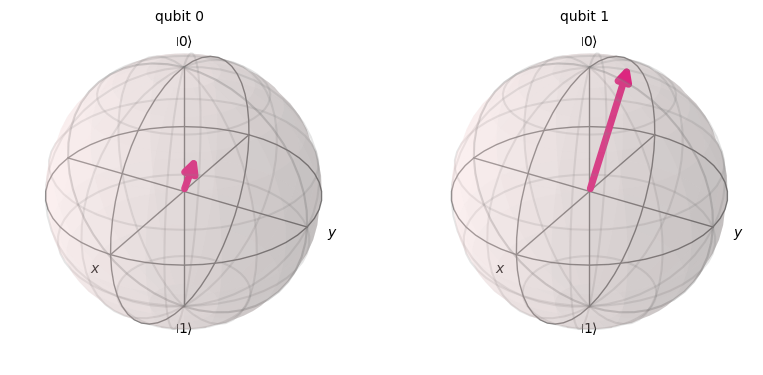

In [48]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np

# Definir los valores de los parámetros
theta = np.pi
phi = np.pi / 2
lambda_val = 7 * np.pi / 2


# Crear un circuito cuántico con dos qubits
qc = QuantumCircuit(2)
qc.initialize(random_statevector(2).data, 0)
qc.initialize(random_statevector(2).data, 1)
print(qc)
plot_bloch_multivector(qc)


<ipython-input-49-a0456bcbb5e4>:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job, memory=True).result()


       ┌──────────────────────────────────────────────┐                    
q_0: ──┤ Initialize(0.23006-0.57989j,-0.557+0.54822j) ├──────────■─────────
     ┌─┴──────────────────────────────────────────────┴┐┌────────┴────────┐
q_1: ┤ Initialize(0.20054+0.91556j,-0.055581-0.34416j) ├┤ U(π,π/2,7π/2,0) ├
     └─────────────────────────────────────────────────┘└─────────────────┘


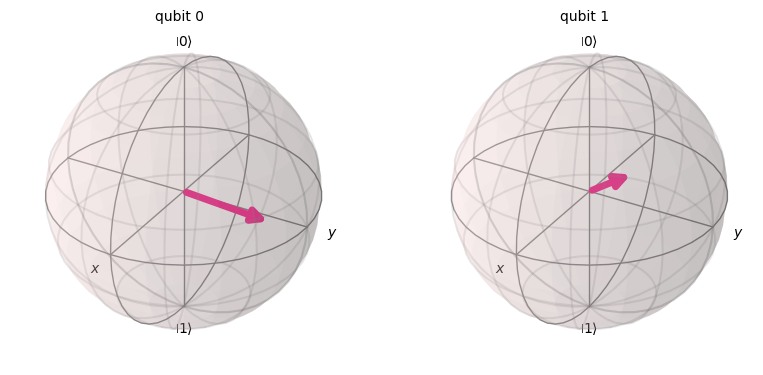

In [49]:
# Agregar una compuerta controlada U3 entre el qubit 0 (control) y el qubit 1 (objetivo)
qc.cu(theta, phi, lambda_val, control_qubit=0, target_qubit =1,gamma=0)

# Simular el circuito
simulator = Aer.get_backend('statevector_simulator')
job = assemble(transpile(qc, simulator), shots=1)
result = simulator.run(job, memory=True).result()
statevector = result.get_statevector()

# Visualizar el estado final
print(qc)
plot_bloch_multivector(statevector)


# Clase 4-5

4.

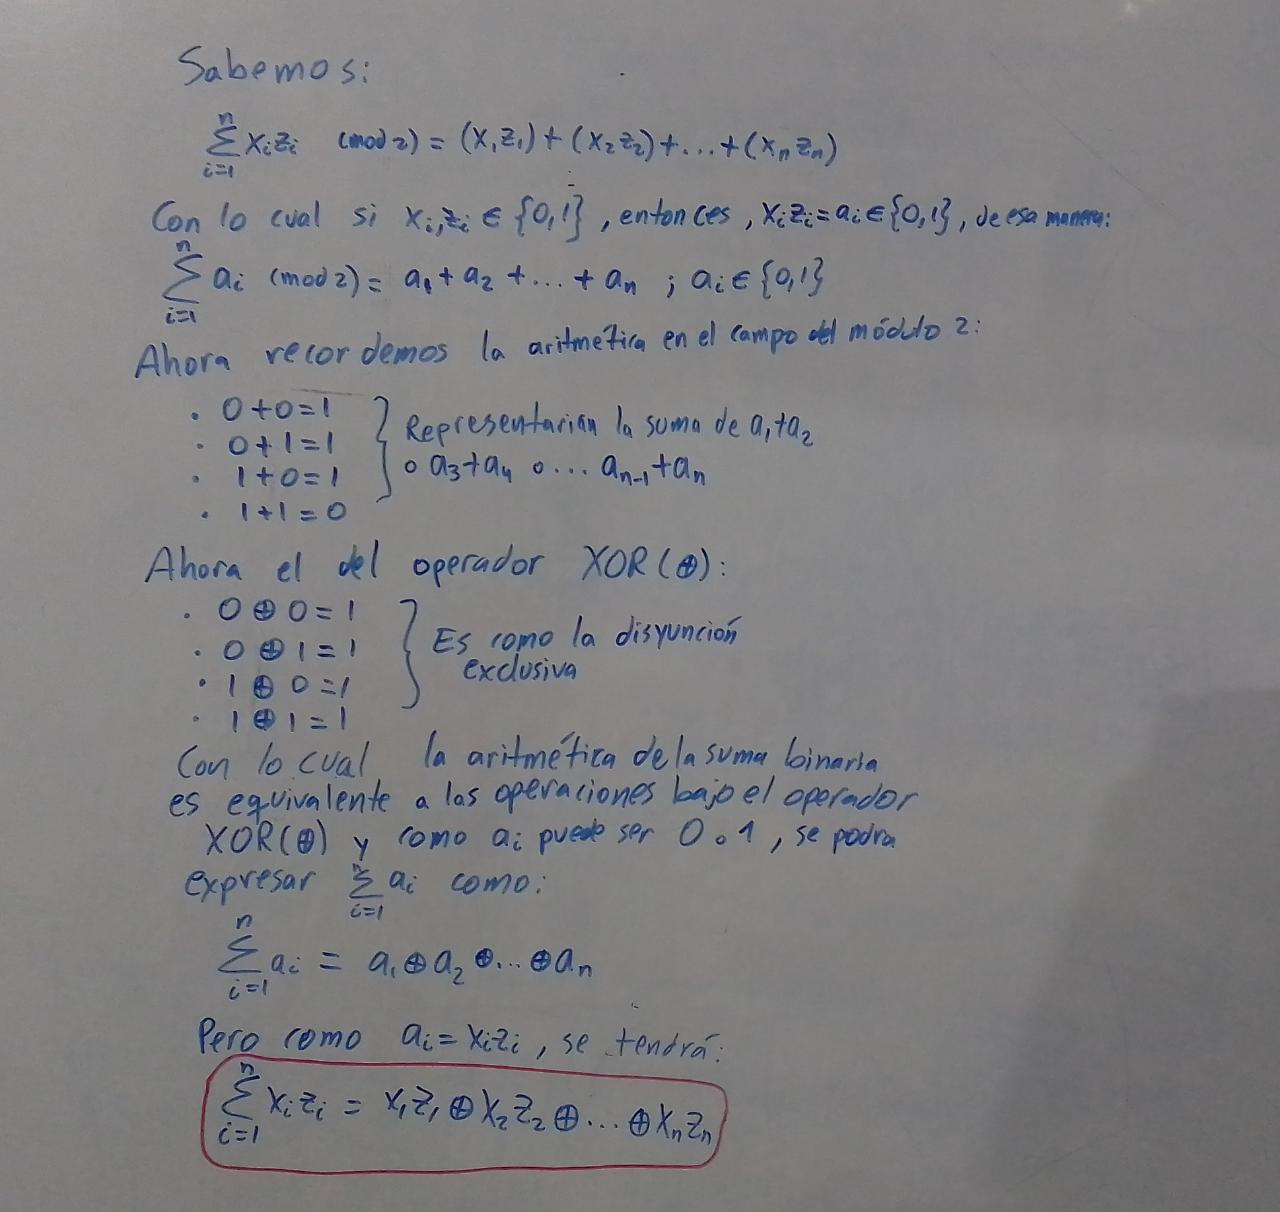

5.

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import CXGate

# Crea un circuito cuántico y un registro cuántico con 3 qubits
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qr, cr)

# Implementa el oráculo balanceado
circuit.x(qr[0])  # Aplica una compuerta X al primer qubit
circuit.append(CXGate(), [qr[0], qr[2]])  # Aplica una compuerta CNOT controlado por el primer y tercer qubit
circuit.x(qr[0])  # Deshace la compuerta X en el primer qubit

# Mide el primer qubit en el registro clásico
circuit.measure(qr[0], cr[0])

# Visualiza el circuito
print(circuit)

     ┌───┐     ┌───┐┌─┐
q_0: ┤ X ├──■──┤ X ├┤M├
     └───┘  │  └───┘└╥┘
q_1: ───────┼────────╫─
          ┌─┴─┐      ║ 
q_2: ─────┤ X ├──────╫─
          └───┘      ║ 
c: 1/════════════════╩═
                     0 


7.

In [ ]:
pip install qiskit-aer

{'10010': 18, '01110': 23, '01001': 44, '10001': 19, '11010': 45, '00101': 25, '00011': 32, '00111': 29, '01011': 28, '10110': 59, '11100': 52, '10101': 47, '10000': 38, '11111': 20, '11011': 23, '00100': 31, '00010': 31, '00001': 44, '00110': 34, '01000': 26, '01100': 36, '01010': 28, '11000': 22, '01111': 24, '10011': 45, '10111': 16, '10100': 23, '01101': 34, '11110': 15, '11001': 61, '00000': 33, '11101': 19}


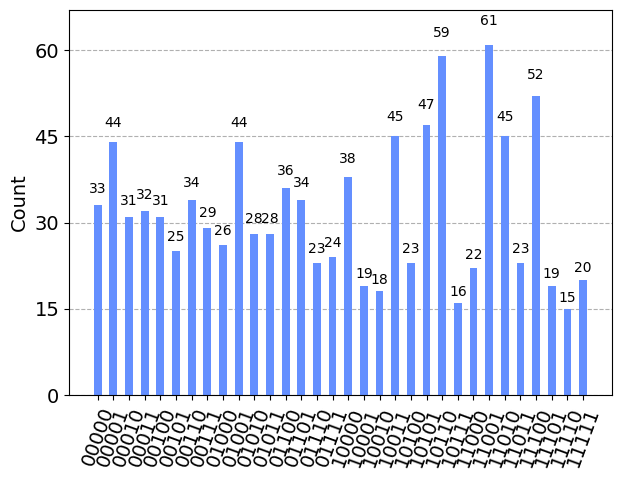

In [10]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Crea un circuito cuántico con 5 qubits, que es lo mismo a decir 5 nodos
n = 5
qr = QuantumRegister(n)
circuit = QuantumCircuit(qr)

# Definimos la máxima cantidad de aristas (6 en este caso)
max_edges = 6

# Implementacion del oráculo que busca la máxima cantidad de aristas
circuit.x(qr)  # Inicializa todos los qubits en el estado |1⟩
circuit.h(qr)  # Aplica una compuerta Hadamard a todos los qubits

# Implementacion del oráculo que marca el estado con la cantidad máxima de aristas (6)
circuit.x(qr[0])  # Marca el estado |00000⟩ como el estado con 6 aristas
circuit.mct(qr[:-1], qr[-1])  # Compuerta Toffoli controlada por los primeros dos qubits

# Implementacion el operador difusor
circuit.h(qr)
circuit.x(qr)

# Implementacion el oráculo inverso
circuit.mct(qr[:-1], qr[-1])  # Compuerta Toffoli controlada por los primeros dos qubits
circuit.x(qr[0])  # Desmarca el estado |00000⟩
circuit.h(qr)

# Medimos los qubits
circuit.measure_all()

# Simulacion del circuito
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circuit)

# Visualizacion de los resultados
print(counts)
plot_histogram(counts)

Extra 1:

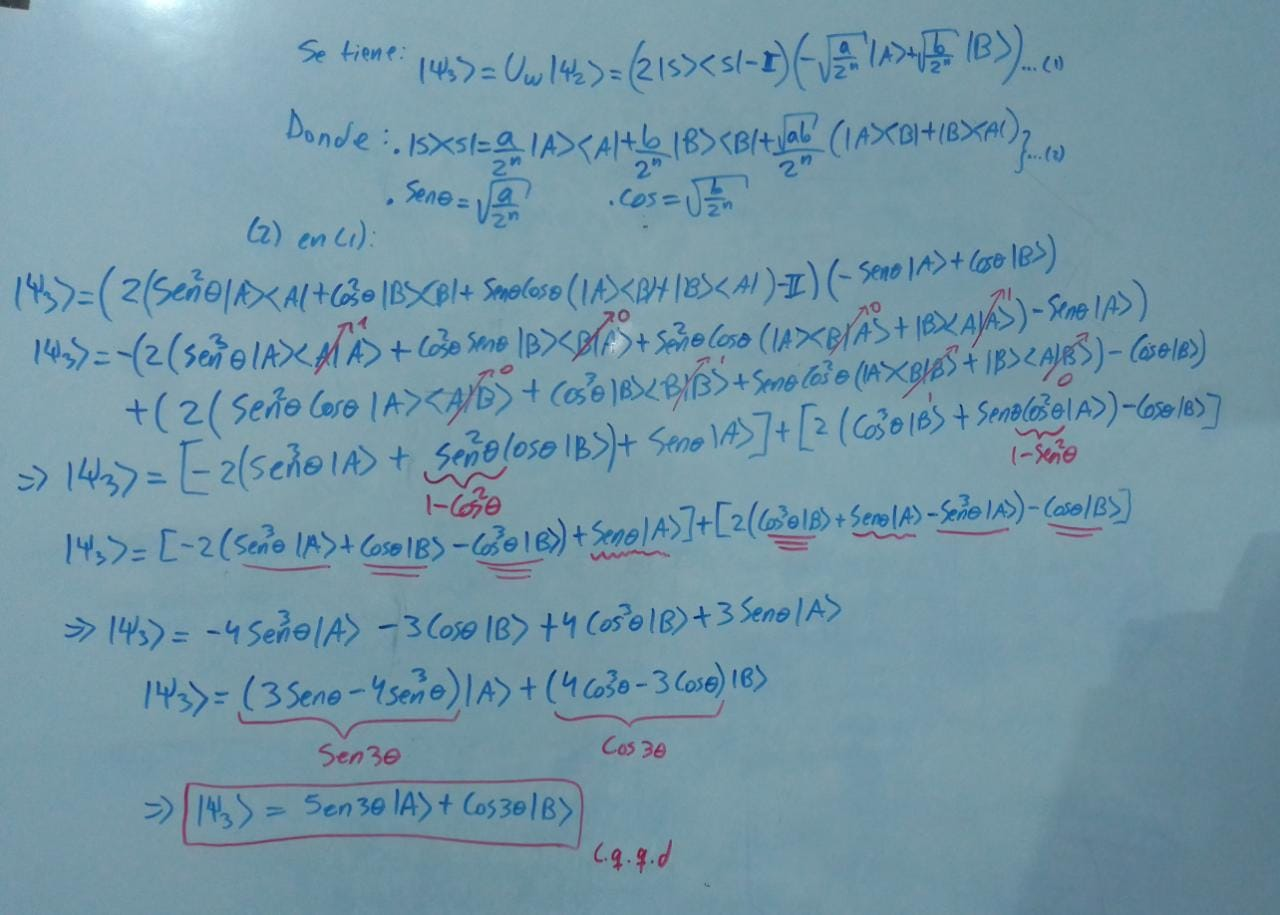

# Clase 6

9.

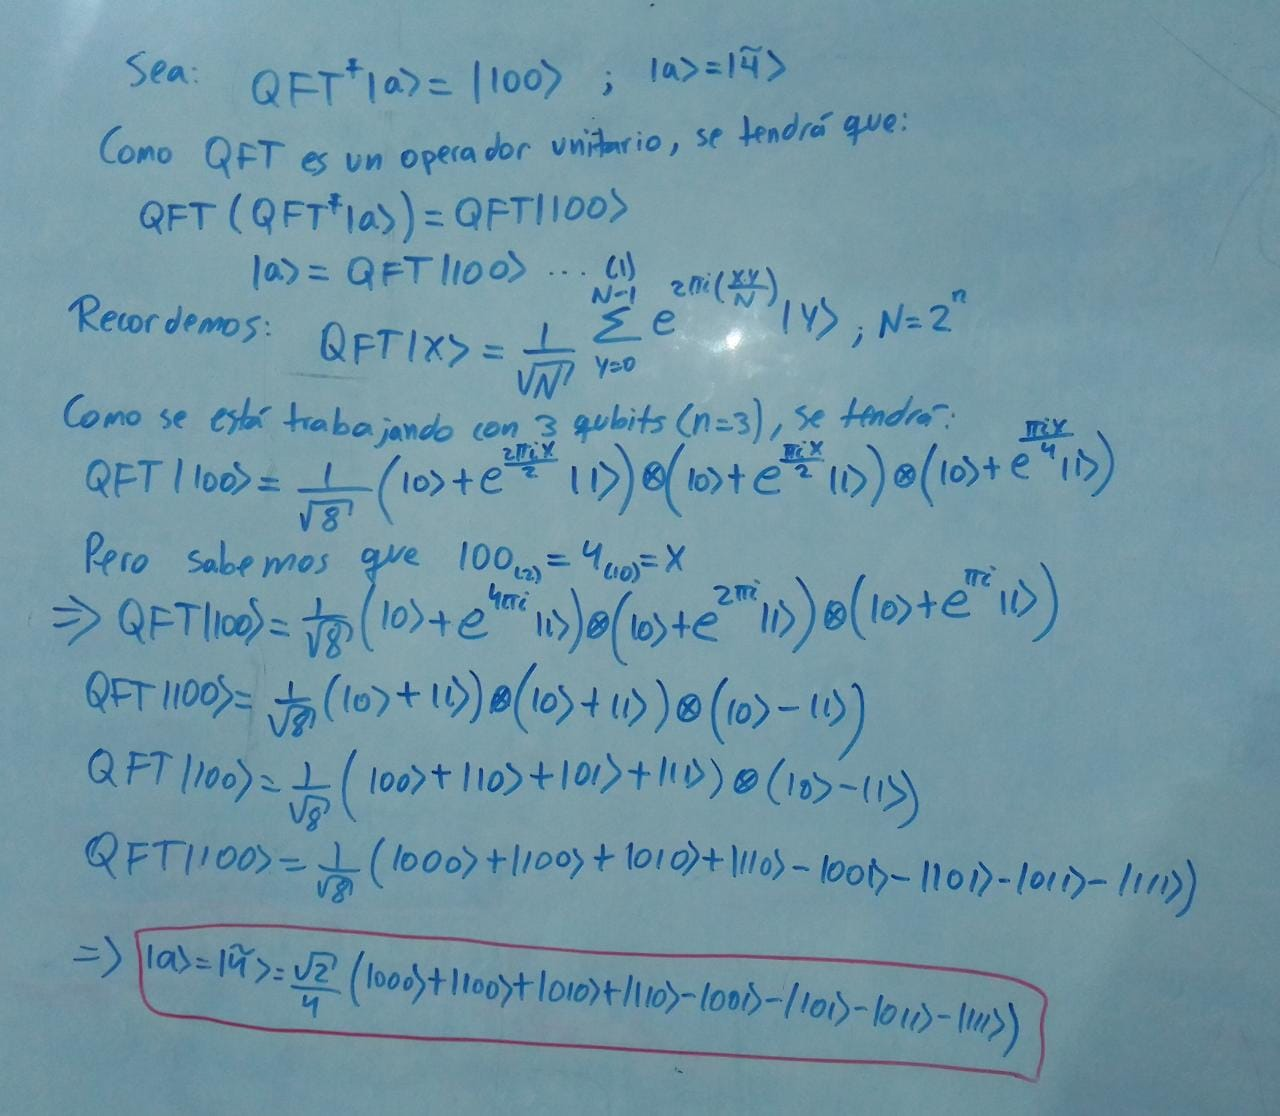

10.

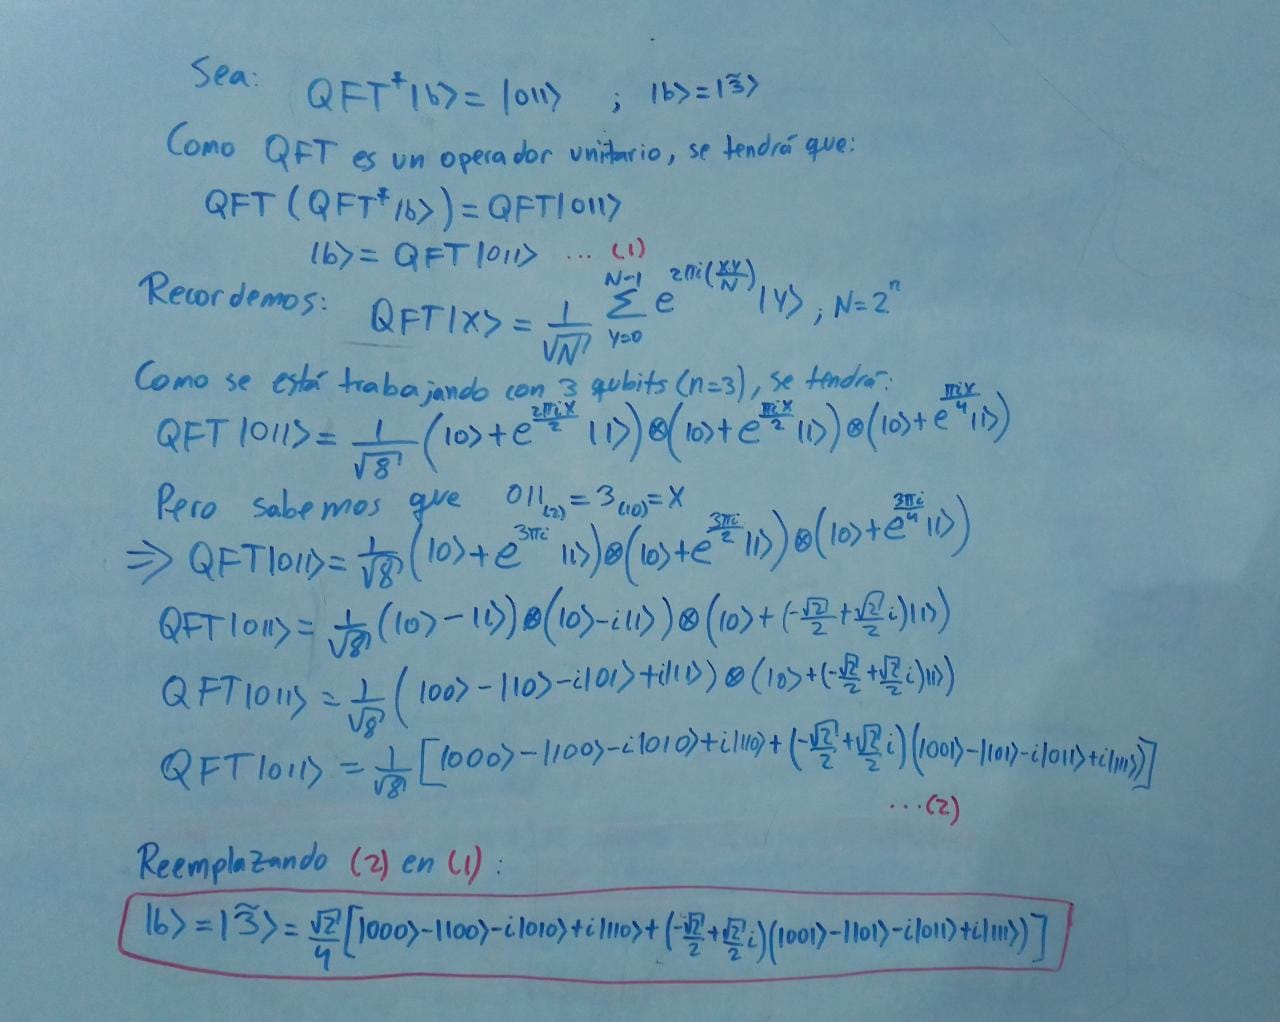